### Step 1. Loading Dataset
Load the `Prima Indians Onset of Diabates` dataset. It is a standard machine learning dataset available for free download from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as
0)


- NTP: Number of times pregnant.
- PGC: Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 3. Diastolic blood pressure (mm Hg).
- TSFT: Triceps skin fold thickness (mm).
- 2hSI: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index.
- DPF: Diabetes pedigree function.
- Age: Age (years).
- OnDiab: Class, onset of diabetes within five years.


- Set the dataset columns names to `['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab']`.
- Print the size of the data set.
- Print the first 10 observations of your data set

In [2]:
import pandas as pd

column_names = ['NTP', 'PGC', 'DBP', 'TSFT', '2hSI', 'BMI', 'DPF', 'Age', 'OnDiab']
df = pd.read_csv('diabetes.csv', names=column_names)

print("Dataset size:", df.shape)
print("\nFirst 10 observations:\n", df.head(10))

Dataset size: (768, 9)

First 10 observations:
    NTP  PGC  DBP  TSFT  2hSI   BMI    DPF  Age  OnDiab
0    6  148   72    35     0  33.6  0.627   50       1
1    1   85   66    29     0  26.6  0.351   31       0
2    8  183   64     0     0  23.3  0.672   32       1
3    1   89   66    23    94  28.1  0.167   21       0
4    0  137   40    35   168  43.1  2.288   33       1
5    5  116   74     0     0  25.6  0.201   30       0
6    3   78   50    32    88  31.0  0.248   26       1
7   10  115    0     0     0  35.3  0.134   29       0
8    2  197   70    45   543  30.5  0.158   53       1
9    8  125   96     0     0   0.0  0.232   54       1


### Step 2: Data type and description for each attribute
- Print the data type for each attribute using `dtypes` method of a pandas data frame
- Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The `describe()` function on the Pandas DataFrame lists 8 statistical properties of each attribute. They are: Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value.
- On classication problems you need to know how balanced the class values are. Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. You can quickly get an idea of the distribution of the `OnDiab` attribute in Pandas. Grup your data by `OnDiab` attribute and use the `size` method to count the number of different values of `class` attribute.

In [3]:
print("Data Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())
print("\nClass Distribution:\n", df.groupby('OnDiab').size())

Data Types:
 NTP         int64
PGC         int64
DBP         int64
TSFT        int64
2hSI        int64
BMI       float64
DPF       float64
Age         int64
OnDiab      int64
dtype: object

Descriptive Statistics:
               NTP         PGC         DBP        TSFT        2hSI         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              DPF         Age      OnDiab  
count  768.

### Step 3: Draw the histogram of your data attributes.
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

- Use `hist()` method of pandas data frame to plot the histograms.

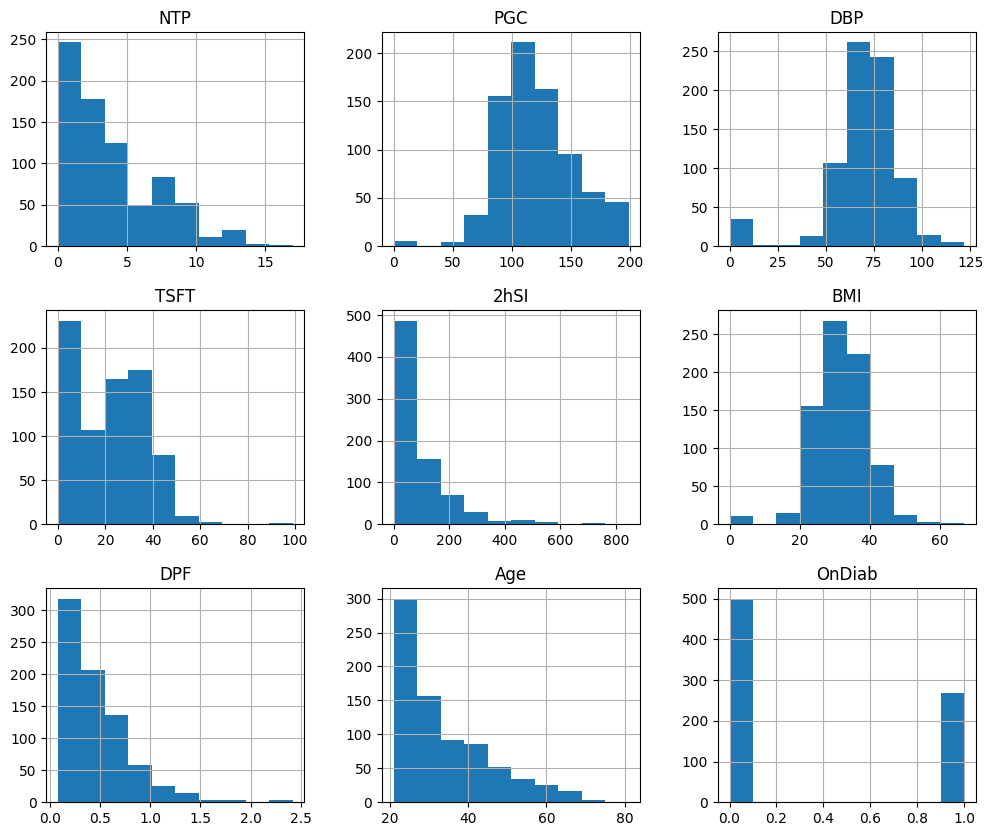

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.show()

### Step 4: Running a Classifier
- Separate your dataset into feature set `X` and target variable `y`. Your target variable is `OnDiab`. 
- Split your dataset into train and test datasets, keep the test dataset size as 0.25 using `test_size` parameter of `train_test_split`. Set the random seed top 7 using `random_state` parameter of `train_test_split`. Make a stratified split.
- Train `KNearestNeighbor` classifer on your train dataset and print the score on the the test dataset. Set number of neighbors to 5.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('OnDiab', axis=1)
y = df['OnDiab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN Classifier Score:", knn.score(X_test, y_test))

KNN Classifier Score: 0.7395833333333334


### Step 5 : Grid Search
- Import `GridSearchCV` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1 to 30`, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score 
- Print the best parameter
- Print the test score

In [6]:
from sklearn.model_selection import GridSearchCV

# neighbors 1 to 30
param_grid = {'n_neighbors': range(1, 31)}
# compute gridsearchcv for training with kfold 10
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best cross-validation score, best parameter, and test score
print("Best Cross-Validation Score:", grid.best_score_)
print("Best Parameter:", grid.best_params_)
test_score = grid.score(X_test, y_test)
print("Test Score:", test_score)

Best Cross-Validation Score: 0.7535087719298246
Best Parameter: {'n_neighbors': 15}
Test Score: 0.71875
